In [3]:
!pip install pyaudio


# Audio recording samp1

In [16]:
import pyaudio
import wave
CHUNK = 2048 
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 2 
RATE = 44100 #sample rate
RECORD_SECONDS = 10
WAVE_OUTPUT_FILENAME = "output.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


In [15]:
import os
print(os.getcwd())

C:\Users\priyv\cse


In [16]:
!dir


 Volume in drive C is OS
 Volume Serial Number is 5EFD-0370

 Directory of C:\Users\priyv\cse

18-12-2024  14:37    <DIR>          .
18-12-2024  14:07    <DIR>          ..
18-12-2024  03:14    <DIR>          .ipynb_checkpoints
18-12-2024  14:37         2,434,679 audio_prep_extract.ipynb
29-08-2024  10:12    <DIR>          cse1
29-08-2024  10:18                39 devops
18-12-2024  03:00        11,229,288 emotion_recognition_ann_model.h5
18-12-2024  03:31        10,144,488 emotion_recognition_model.h5
18-12-2024  03:45        10,142,153 emotion_recognition_model.keras
29-08-2024  10:16    <DIR>          file1
29-08-2024  10:16    <DIR>          file10
29-08-2024  10:16    <DIR>          file2
29-08-2024  10:16    <DIR>          file3
29-08-2024  10:16    <DIR>          file4
29-08-2024  10:16    <DIR>          file5
29-08-2024  10:16    <DIR>          file6
29-08-2024  10:16    <DIR>          file7
29-08-2024  10:16    <DIR>          file8
29-08-2024  10:16    <DIR>          file9
18-12

In [8]:
import matplotlib.pyplot as plt

In [18]:
!pip install librosa

In [19]:
import librosa
import librosa.display

In [20]:
import IPython.display as ipd

In [21]:
fnam =  "output.wav"

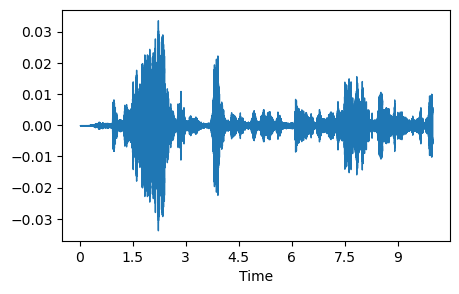

In [22]:
plt.figure(figsize=(5,3))
data,samp_rate = librosa.load(fnam)
librosa.display.waveshow(data,sr=samp_rate)
#plt.plot(data)
ipd.Audio(fnam)

### making panda series 

In [11]:
import pandas as pd

In [23]:
pd.Series(data)

0        -3.085730e-06
1        -9.936893e-06
2        -2.900808e-06
3         9.140126e-08
4         8.371262e-07
              ...     
220155   -1.728308e-03
220156   -1.373756e-03
220157   -8.192552e-04
220158   -1.501305e-04
220159   -2.972534e-04
Length: 220160, dtype: float32

# zoom in 

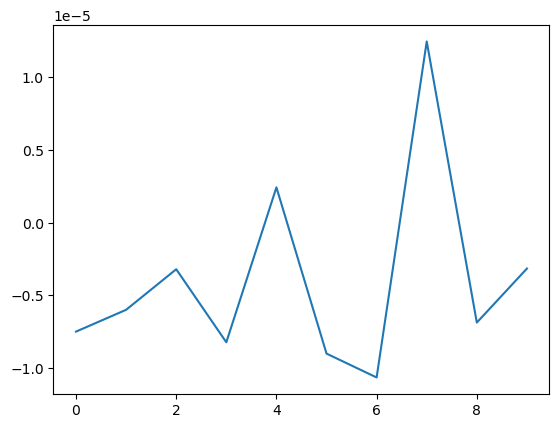

<Figure size 17500x12500 with 0 Axes>

In [23]:
pd.Series(data[40:50]).plot()
plt.figure(figsize = (7,5),dpi = 2500)
plt.show()

# extractor 

In [24]:
mfccs = librosa.feature.mfcc(y=data, sr=samp_rate, n_mfcc=40)
print(mfccs.shape)

(40, 431)


In [17]:
mfccs

array([[-7.7043390e+02, -7.7043390e+02, -7.7043390e+02, ...,
        -7.5729504e+02, -7.4881018e+02, -7.3857465e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.8127630e+01,  2.9719482e+01,  4.2354309e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.6868172e+01,  2.7295574e+01,  3.5292160e+01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.0957845e+00,  8.6069441e-01,  2.7330616e-01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         9.1614306e-01,  9.9844569e-01,  2.0473826e-01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.3780283e-01,  7.8289616e-01,  5.0973475e-02]], dtype=float32)

In [24]:
# defining the mel frequency cepstral coefficient 
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name) 
    mfccs_features = librosa.feature.mfcc(y=data, sr=samp_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

# load dataset and data preprocessing 

In [25]:
import os
import librosa
import pandas as pd
import numpy as np

# Emotion mapping based on RAVDESS file naming convention
EMOTIONS = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

def parse_ravdess_filename(file_name):
    """
    Parse the RAVDESS filename to extract the emotion label and other metadata.
    """
    parts = file_name.split('-')
    emotion_code = parts[2] 
    emotion = EMOTIONS.get(emotion_code, "unknown")
    return emotion

def extract_audio_features(file_path, n_mfcc=40):
    """
    Extract only MFCC features from a file.
    """
    try:
        y, sr = librosa.load(file_path, sr=None)
        duration = librosa.get_duration(y=y, sr=sr)
        
        
        mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc).T, axis=0)
        
        return {
            "duration": duration,
            "sample_rate": sr,
            **{f"mfcc_{i+1}": mfcc for i, mfcc in enumerate(mfccs)}
        }
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

def ravdess_to_csv(dataset_path, output_csv_path):
    """
    Process RAVDESS audio files from a folder structure like Actor_01, Actor_02, ..., Actor_24
    and save metadata and features (only MFCC) to a CSV file.
    """
    data = []

    
    for actor_folder in os.listdir(dataset_path):
        actor_path = os.path.join(dataset_path, actor_folder)
        if os.path.isdir(actor_path):  # Ensure it is a directory
            for file in os.listdir(actor_path):
                if file.endswith(".wav"):
                    file_path = os.path.join(actor_path, file)
                    emotion_label = parse_ravdess_filename(file)

                    # Extract MFCC features
                    features = extract_audio_features(file_path)
                    if features:
                        features["file_path"] = file_path
                        features["actor"] = actor_folder  
                        features["label"] = emotion_label
                        data.append(features)

   
    df = pd.DataFrame(data)
    df.to_csv(output_csv_path, index=False)
    print(f"CSV file saved to {output_csv_path}")


dataset_path = "speech-emotion-recognition-ravdess-data"  
output_csv_path = "ravdess_mfcc_features.csv"
ravdess_to_csv(dataset_path, output_csv_path)


CSV file saved to ravdess_mfcc_features.csv


In [26]:
import os
print(os.path.exists(output_csv_path))  


True


In [27]:
test_file = "speech-emotion-recognition-ravdess-data/Actor_01/03-01-01-01-02-01-01.wav"
features = extract_audio_features(test_file)
print(features)


{'duration': 3.2699375, 'sample_rate': 16000, 'mfcc_1': -677.8081, 'mfcc_2': 51.402702, 'mfcc_3': -0.009545798, 'mfcc_4': 14.301585, 'mfcc_5': 0.7671622, 'mfcc_6': -0.23838186, 'mfcc_7': -6.169594, 'mfcc_8': -10.741854, 'mfcc_9': -7.6211886, 'mfcc_10': 1.282321, 'mfcc_11': -3.8150868, 'mfcc_12': 1.9573514, 'mfcc_13': -5.7387285, 'mfcc_14': 0.3985472, 'mfcc_15': -2.4818628, 'mfcc_16': -5.3536325, 'mfcc_17': -1.3868858, 'mfcc_18': 0.85493225, 'mfcc_19': -5.603166, 'mfcc_20': -2.0104146, 'mfcc_21': -2.2021217, 'mfcc_22': -4.327673, 'mfcc_23': -0.26211378, 'mfcc_24': -2.7748287, 'mfcc_25': -2.8519413, 'mfcc_26': -1.027859, 'mfcc_27': -1.7407987, 'mfcc_28': -0.80484164, 'mfcc_29': -3.126437, 'mfcc_30': -2.0625024, 'mfcc_31': -2.6007326, 'mfcc_32': -2.66617, 'mfcc_33': -2.000873, 'mfcc_34': -1.4351019, 'mfcc_35': -4.338004, 'mfcc_36': -2.7257943, 'mfcc_37': -3.0296626, 'mfcc_38': -1.5409077, 'mfcc_39': -2.3167748, 'mfcc_40': -2.4746187}


In [28]:
import pandas as pd
df = pd.read_csv("ravdess_mfcc_features.csv")
df.head()


,duration,sample_rate,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,mfcc_34,mfcc_35,mfcc_36,mfcc_37,mfcc_38,mfcc_39,mfcc_40,file_path,actor,label
0,3.303313,16000,-693.49700,50.064392,0.571451,14.329966,3.336370,-2.540719,-4.057909,-10.711999,...,-0.554154,-3.964599,-2.134852,-3.945771,-1.624579,-2.039907,-3.629108,speech-emotion-recognition-ravdess-data\Actor_...,Actor_01,neutral
1,3.336688,16000,-683.34680,48.889260,-1.683444,19.183002,1.969590,-0.799272,-4.795028,-12.342567,...,-1.865460,-4.270066,-2.396406,-4.606637,-1.184742,-2.140252,-2.958484,speech-emotion-recognition-ravdess-data\Actor_...,Actor_01,neutral
2,3.269938,16000,-677.80810,51.402702,-0.009546,14.301585,0.767162,-0.238382,-6.169594,-10.741854,...,-1.435102,-4.338004,-2.725794,-3.029663,-1.540908,-2.316775,-2.474619,speech-emotion-recognition-ravdess-data\Actor_...,Actor_01,neutral
3,3.169812,16000,-674.01917,50.680557,1.878226,14.295362,3.069178,1.584900,-7.450740,-11.413989,...,-1.310382,-3.588744,-3.792770,-3.513380,-1.512921,-2.195736,-2.678607,speech-emotion-recognition-ravdess-data\Actor_...,Actor_01,neutral
4,3.536875,16000,-709.05680,55.734306,2.668310,16.362572,3.344781,-1.124848,-5.818393,-8.999178,...,-1.536171,-3.605385,-3.623699,-4.169817,-2.332985,-1.299511,-1.498474,speech-emotion-recognition-ravdess-data\Actor_...,Actor_01,calm


# Train ANN Using CSV Data

In [21]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Import StandardScaler
from tensorflow.keras.utils import to_categorical  # Correct import for to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import librosa

# Load csv
csv_file = "ravdess_mfcc_features.csv"  # Path to the CSV file
data = pd.read_csv(csv_file)

# Features and Labels
X = data.drop(columns=["file_path", "actor", "label"])
y = data["label"]

# Encode Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = to_categorical(y_encoded)

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=42)

# Build ANN 
model = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(800, activation="relu"),
    Dropout(0.5),
    Dense(500, activation="relu"),
    Dropout(0.5),
    Dense(800, activation="relu"),
    Dropout(0.5),
    Dense(y_one_hot.shape[1], activation="softmax")
])

# Compile the Model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1)
early_stopper = EarlyStopping(monitor="val_accuracy", patience=20, restore_best_weights=True)

# Train the Model
history = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler, early_stopper]
)

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the Model in the New Format
model.save("emotion_recognition_model.keras")  
print("Model saved as emotion_recognition_model.keras")


Epoch 1/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1686 - loss: 2.0668 - val_accuracy: 0.3715 - val_loss: 1.7286 - learning_rate: 0.0010
Epoch 2/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3087 - loss: 1.7775 - val_accuracy: 0.4028 - val_loss: 1.5531 - learning_rate: 0.0010
Epoch 3/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4170 - loss: 1.5474 - val_accuracy: 0.5000 - val_loss: 1.3648 - learning_rate: 0.0010
Epoch 4/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5138 - loss: 1.3444 - val_accuracy: 0.5000 - val_loss: 1.2719 - learning_rate: 0.0010
Epoch 5/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4830 - loss: 1.3042 - val_accuracy: 0.5312 - val_loss: 1.2518 - learning_rate: 0.0010
Epoch 6/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5390 - loss: 1.2237 - val_accuracy: 0.5243 - val_loss: 1.2134 - learning_rate: 0.0010
Epoch 7/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5876 - loss: 1.1239 - val_acc

# Predictor Function

In [17]:
def predict_emotion(audio_file):
    """
    Predict the emotion of the given audio file.

    Args:
        audio_file (str): Path to the audio file.

    Returns:
        str: Predicted emotion label.
    """
    # Load the saved model
    model = load_model("emotion_recognition_model.keras")  

    
    y, sr = librosa.load(audio_file, duration=2.5, offset=0.6, sr=22050)  # Load the audio
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)  # Extract MFCC features
    mfccs_mean = np.mean(mfccs.T, axis=0)  

    
    num_features = X_train.shape[1]  
    if len(mfccs_mean) < num_features:
        
        mfccs_mean = np.pad(mfccs_mean, (0, num_features - len(mfccs_mean)), mode='constant')
    elif len(mfccs_mean) > num_features:
        
        mfccs_mean = mfccs_mean[:num_features]

   
    mfccs_scaled = scaler.transform([mfccs_mean])  # Ensure it matches the scaler

   
    prediction = model.predict(mfccs_scaled)
    predicted_label = np.argmax(prediction)

    
    emotion = label_encoder.inverse_transform([predicted_label])[0]
    return emotion


audio_file = "output.wav" 
predicted_emotion = predict_emotion(audio_file)
print(f"The predicted emotion is: {predicted_emotion}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The predicted emotion is: sad


C:\Users\priyv\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Model Loss

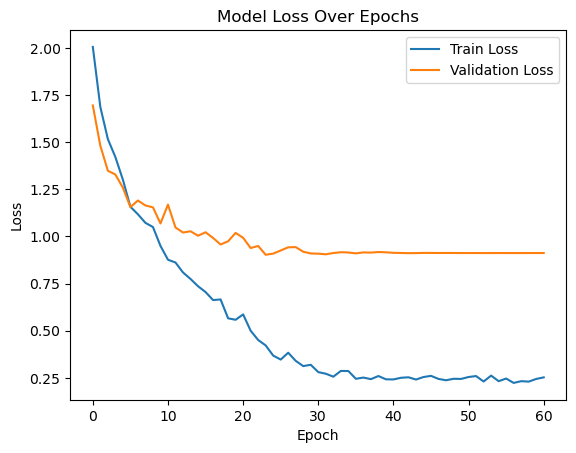

In [18]:
import matplotlib.pyplot as plt

# Plot model loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


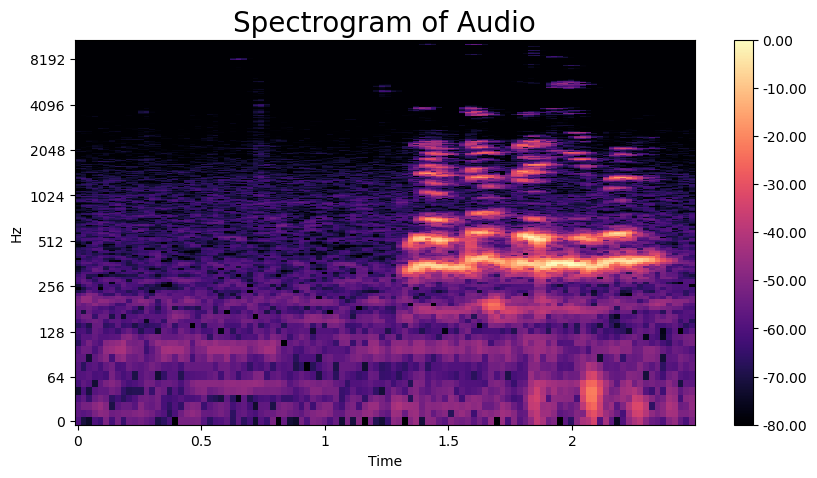

In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

def plot_spectrogram(audio_file):
    
    # Load the audio file
    y, sr = librosa.load(audio_file, duration=2.5, offset=0.6, sr=22050)  # Matches training parameters

    # Short-Time Fourier Transform (STFT)
    D = librosa.stft(y)

    # Convert to decibels (log scale) for visualization
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    # Plot the Spectrogram
    fig, ax = plt.subplots(figsize=(10, 5))
    img = librosa.display.specshow(S_db, x_axis="time", y_axis="log", sr=sr, ax=ax)
    
    ax.set_title("Spectrogram of Audio", fontsize=20)
    fig.colorbar(img, ax=ax, format="%0.2f")  
    plt.show()


plot_spectrogram("output.wav") 
